# Mineria de texto SparkNLP

In [54]:
!pip install -r requirements.txt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [55]:
import pandas as pd
import numpy as np
mainFolder='https://datalake-integrador.s3.amazonaws.com/Refined/Supervised/' # Genérico

pathIn= mainFolder
pathOut= mainFolder + "Out/"
filenamecsv='Mental-Health-Twitter.csv'
df_depression = pd.read_csv(filenamecsv, sep=',', encoding='utf-8-sig')


## Tweet Tokenizer

In [56]:
from nltk.tokenize import TweetTokenizer

tk = TweetTokenizer(reduce_len=True,strip_handles=True)

tk_tokens = [tk.tokenize(tweet) for tweet in df_depression["post_text"].tolist() if True]
tk_tweets = [" ".join(token) for token in tk_tokens if True] 

df_depression["tk_tweet"] = tk_tweets
df_depression



,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,tk_tweet
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,It's just over 2 years since I was diagnosed w...
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,"It's Sunday , I need a break , so I'm planning..."
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,Awake but tired . I need to sleep but my brain...
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,RT : #Retro bears make perfect gifts and are g...
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,It ’ s hard to say whether packing lists are m...
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,A day without sunshine is like night .
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,"Boren's Laws : ( 1 ) When in charge , ponder ...."
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,The flow chart is a most thoroughly oversold p...
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,"Ships are safe in harbor , but they were never..."


In [4]:
#SPARKNLP
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('nlp').config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:4.2.0").getOrCreate()


:: loading settings :: url = jar:file:/root/venv/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-831b3e24-7d65-4125-8f64-47e7bc43ba36;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;4.2.0 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.code.findbugs#annotations;3.0.1 in central
	found net.jcip#jcip-annotations;1.0 in central
	found com.google.code.findbugs#jsr305;3.0.1 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-

## Separacion de datos de entrenamiento y datos de prueba

In [5]:
df_spark= spark.createDataFrame(df_depression)
train_df, test_df = df_spark.randomSplit([0.8,0.2],seed=100)

In [6]:
train_df.count()

22/11/28 03:36:53 WARN TaskSetManager: Stage 0 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.


15990

In [7]:
test_df.show(4)

22/11/28 03:36:56 WARN TaskSetManager: Stage 3 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.
+----------+------------------+--------------------+--------------------+----------+---------+-------+----------+--------+--------+-----+--------------------+
|Unnamed: 0|           post_id|        post_created|           post_text|   user_id|followers|friends|favourites|statuses|retweets|label|            tk_tweet|
+----------+------------------+--------------------+--------------------+----------+---------+-------+----------+--------+--------+-----+--------------------+
|         3|637696421077123073|Sat Aug 29 18:40:...|RT @SewHQ: #Retro...|1013187241|       84|    211|       251|     837|       2|    1|RT : #Retro bears...|
|        10|637684675557896193|Sat Aug 29 17:54:...|... also, I have ...|1013187241|       84|    211|       251|     837|       1|    1|... also , I have...|
|        14|637314209559281664|Fri Aug 28 17:22:...|Urgh. Anxiet

## Creacion del pipeline para Naive Bayes

In [8]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [9]:
#SPARKNLP
from pyspark.sql import SparkSession
from pyspark.ml.feature import StopWordsRemover
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import HashingTF
from pyspark.ml.feature import IDF
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator






remover = StopWordsRemover()
stopwords =remover.loadDefaultStopWords("english") #+remover.loadDefaultStopWords("spanish") + remover.loadDefaultStopWords("french")




documentAssembler = DocumentAssembler() \
    .setInputCol("tk_tweet") \
    .setOutputCol("document")

sentence = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")


tokenizer = Tokenizer() \
    .setInputCols(["sentence"]) \
    .setOutputCol("tokens")


normalizer = Normalizer() \
    .setInputCols(["tokens"]) \
    .setOutputCol("normalized") \
    .setLowercase(True) \
    .setCleanupPatterns(["""[^\w\d\s]"""]) # remove punctuations (keep alphanumeric chars)



stopWordsCleaner = StopWordsCleaner()\
      .setInputCols("normalized")\
      .setOutputCol("cleanTokens")\
      .setStopWords(stopwords)\
      .setCaseSensitive(False)



stemmer = Stemmer() \
    .setInputCols(["cleanTokens"]) \
    .setOutputCol("stem")

nGrams = NGramGenerator() \
    .setInputCols(["stem"]) \
    .setOutputCol("ngrams") \
    .setN(1) \
    .setEnableCumulative(False)


finisher = Finisher() \
    .setInputCols(["ngrams"]) \
    .setIncludeMetadata(True)\
    .setOutputAsArray(True)

#TF-IDF

# podria utilizar numFeatures como el tamaño del Bag of Words:
#l = len(bow)
hash_tf=HashingTF(inputCol="finished_ngrams",outputCol='tf_features')
#hashing_df=hashing_vec.transform(result)

#IDF

tf_idf=IDF(inputCol='tf_features',outputCol='tf_idf_features')
#idfmodel =tf_idf_vec.fit(hashing_df)
#tf_idf_df = idfmodel.transform(hashing_df)

nbayes = NaiveBayes(featuresCol='tf_idf_features',modelType = 'multinomial',smoothing=14)

pipeline = Pipeline().setStages([
    documentAssembler,
    sentence,
    tokenizer,
    normalizer,
    stopWordsCleaner,
    stemmer,
    nGrams,
    finisher,
    hash_tf,
    tf_idf,
    nbayes
])

#CountVectorizer
#count_vec=CountVectorizer(inputCol='finished_ngrams',outputCol='features')
#cv_df=count_vec.fit(result).transform(result)
#cv_df.select(['finished_ngrams','features']).show(4,False)
#bow = count_vec.fit(result).vocabulary

### Creacion del clasificador

In [10]:
nb_classification = pipeline.fit(train_df)


22/11/28 03:37:00 WARN TaskSetManager: Stage 4 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.
22/11/28 03:37:19 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
22/11/28 03:37:19 WARN TaskSetManager: Stage 5 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.
22/11/28 03:37:29 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB


In [11]:
type()

TypeError: type() takes 1 or 3 arguments

In [ ]:
nb_classification.save("nb_classifier")

22/11/27 21:23:31 WARN TaskSetManager: Stage 17 contains a task of very large size (4184 KiB). The maximum recommended task size is 1000 KiB.
22/11/27 21:23:35 WARN TaskSetManager: Stage 21 contains a task of very large size (4185 KiB). The maximum recommended task size is 1000 KiB.


### Evaluacion del clasificador

In [ ]:
pred_bayes= nb_classification.transform(test_df)

In [ ]:
pred_bayes.show(3,truncate=False)

22/11/27 00:17:16 WARN DAGScheduler: Broadcasting large task binary with size 8.2 MiB
22/11/27 00:17:16 WARN TaskSetManager: Stage 203 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.
+----------+------------------+------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------+----------+---------+-------+----------+--------+--------+-----+----------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label")
accuracy = evaluator.evaluate(pred_bayes)
accuracy


22/11/26 22:29:57 WARN DAGScheduler: Broadcasting large task binary with size 8.2 MiB
22/11/26 22:29:57 WARN TaskSetManager: Stage 54 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.


0.7867341225290535

In [ ]:
df_bayes = pred_bayes.select("label","prediction")
df_bayes.show(10)

22/11/26 22:18:53 WARN DAGScheduler: Broadcasting large task binary with size 8.1 MiB
22/11/26 22:18:53 WARN TaskSetManager: Stage 21 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.
+-----+----------+
|label|prediction|
+-----+----------+
|    1|       1.0|
|    1|       1.0|
|    1|       1.0|
|    1|       0.0|
|    1|       0.0|
|    1|       1.0|
|    1|       0.0|
|    1|       1.0|
|    1|       1.0|
|    1|       1.0|
+-----+----------+
only showing top 10 rows



In [ ]:
df_bayes = df_bayes.toPandas()

22/11/26 22:18:54 WARN DAGScheduler: Broadcasting large task binary with size 8.1 MiB
22/11/26 22:18:54 WARN TaskSetManager: Stage 22 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.


### Reporte de clasificacion

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_bayes.label,df_bayes.prediction))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      2044
           1       0.76      0.83      0.79      1966

    accuracy                           0.79      4010
   macro avg       0.79      0.79      0.79      4010
weighted avg       0.79      0.79      0.79      4010



In [ ]:
#data = []
#for i in range(1, 5):
#    nGrams = (
#        NGramGenerator()
#        .setInputCols(["stem"])
#        .setOutputCol("ngrams")
#        .setN(i)
#       .setEnableCumulative(True)
#   )
#
#   pipeline = Pipeline().setStages(
#       [
#           documentAssembler,
#           sentence,
#           tokenizer,
#           normalizer,
#           stopWordsCleaner,
#           stemmer,
#           nGrams,
#           finisher,
#           hash_tf,
#           tf_idf,
#           nbayes,
#       ]
#   )
#
#   nb_classification = pipeline.fit(train_df)
#   pred_bayes = nb_classification.transform(test_df)
#
#   evaluator = MulticlassClassificationEvaluator(
#       labelCol="label", predictionCol="prediction", metricName="accuracy"
#   )
#   accuracy = evaluator.evaluate(pred_bayes)
#    data.append((i, accuracy))

#x = []
#y=[]
#for each in data:
#    x.append(each[0])
#    y.append(each[1])
#
#from matplotlib import pyplot as plt
#
#plt.plot(x,y)

#14 es el mejor valor para naive bayes smoothing
#funciona mejor con 1-grams

## Creacion del pipeline para Random Forest

In [18]:
#SPARKNLP
from pyspark.sql import SparkSession
from pyspark.ml.feature import StopWordsRemover
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import HashingTF
from pyspark.ml.feature import IDF
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator






remover = StopWordsRemover()
stopwords =remover.loadDefaultStopWords("english") #+remover.loadDefaultStopWords("spanish") + remover.loadDefaultStopWords("french")




documentAssembler = DocumentAssembler() \
    .setInputCol("tk_tweet") \
    .setOutputCol("document")

sentence = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")


tokenizer = Tokenizer() \
    .setInputCols(["sentence"]) \
    .setOutputCol("tokens")


normalizer = Normalizer() \
    .setInputCols(["tokens"]) \
    .setOutputCol("normalized") \
    .setLowercase(True) \
    .setCleanupPatterns(["""[^\w\d\s]"""]) # remove punctuations (keep alphanumeric chars)



stopWordsCleaner = StopWordsCleaner()\
      .setInputCols("normalized")\
      .setOutputCol("cleanTokens")\
      .setStopWords(stopwords)\
      .setCaseSensitive(False)



stemmer = Stemmer() \
    .setInputCols(["cleanTokens"]) \
    .setOutputCol("stem")

nGrams = NGramGenerator() \
    .setInputCols(["stem"]) \
    .setOutputCol("ngrams") \
    .setN(2) \
    .setEnableCumulative(True)


finisher = Finisher() \
    .setInputCols(["ngrams"]) \
    .setIncludeMetadata(True)\
    .setOutputAsArray(True)

#TF-IDF

# podria utilizar numFeatures como el tamaño del Bag of Words:
#l = len(bow)
hash_tf=HashingTF(inputCol="finished_ngrams",outputCol='tf_features')
#hashing_df=hashing_vec.transform(result)

#IDF

tf_idf=IDF(inputCol='tf_features',outputCol='tf_idf_features')
#idfmodel =tf_idf_vec.fit(hashing_df)
#tf_idf_df = idfmodel.transform(hashing_df)

randforest = RandomForestClassifier(featuresCol="tf_idf_features", labelCol="label", seed=42)

pipeline = Pipeline().setStages([
    documentAssembler,
    sentence,
    tokenizer,
    normalizer,
    stopWordsCleaner,
    stemmer,
    nGrams,
    finisher,
    hash_tf,
    tf_idf,
    randforest
])

#CountVectorizer
#count_vec=CountVectorizer(inputCol='finished_ngrams',outputCol='features')
#cv_df=count_vec.fit(result).transform(result)
#cv_df.select(['finished_ngrams','features']).show(4,False)
#bow = count_vec.fit(result).vocabulary

### Creacion del clasificador

In [ ]:
randforest_classifier = pipeline.fit(train_df)

22/11/27 21:26:23 WARN TaskSetManager: Stage 55 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.
22/11/27 21:26:44 WARN TaskSetManager: Stage 56 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.
22/11/27 21:26:45 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
22/11/27 21:26:45 WARN TaskSetManager: Stage 59 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.
22/11/27 21:26:46 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
22/11/27 21:26:46 WARN TaskSetManager: Stage 60 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.
22/11/27 21:27:03 WARN DAGScheduler: Broadcasting large task binary with size 6.7 MiB
22/11/27 21:27:03 WARN TaskSetManager: Stage 61 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.
22/11/27 21:30:51 WARN DAGSchedu

In [ ]:
randforest_classifier.save("randforest_classifier")

22/11/27 21:34:23 WARN TaskSetManager: Stage 86 contains a task of very large size (4184 KiB). The maximum recommended task size is 1000 KiB.


### Evaluacion del clasificador

In [ ]:
randforest_pred = randforest_classifier.transform(test_df)

In [ ]:
randforest_df = randforest_pred.select("label","prediction").toPandas()


22/11/26 22:26:02 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
22/11/26 22:26:02 WARN TaskSetManager: Stage 41 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.


In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="label",metricName="areaUnderPR")
accuracy = evaluator.evaluate(randforest_pred)
accuracy


22/11/26 22:26:07 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
22/11/26 22:26:07 WARN TaskSetManager: Stage 42 contains a task of very large size (4550 KiB). The maximum recommended task size is 1000 KiB.


0.6874251914176264

### Reporte de clasificacion

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(randforest_df.label,randforest_df.prediction))

              precision    recall  f1-score   support

           0       0.81      0.11      0.19      2044
           1       0.51      0.97      0.67      1966

    accuracy                           0.53      4010
   macro avg       0.66      0.54      0.43      4010
weighted avg       0.66      0.53      0.43      4010



## Creacion del modelo KNN

In [ ]:
df_depression


,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,tk_tweet
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,It's just over 2 years since I was diagnosed w...
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,"It's Sunday , I need a break , so I'm planning..."
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,Awake but tired . I need to sleep but my brain...
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,RT : #Retro bears make perfect gifts and are g...
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,It ’ s hard to say whether packing lists are m...
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,A day without sunshine is like night .
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,"Boren's Laws : ( 1 ) When in charge , ponder ...."
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,The flow chart is a most thoroughly oversold p...
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,"Ships are safe in harbor , but they were never..."


In [ ]:
df_depression["post_created"] = pd.to_datetime(df_depression["post_created"])
df_depression["post_created"] = df_depression["post_created"].dt.time
df_depression

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,tk_tweet
0,0,637894677824413696,07:48:37,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,It's just over 2 years since I was diagnosed w...
1,1,637890384576778240,07:31:33,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,"It's Sunday , I need a break , so I'm planning..."
2,2,637749345908051968,22:11:07,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,Awake but tired . I need to sleep but my brain...
3,3,637696421077123073,18:40:49,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,RT : #Retro bears make perfect gifts and are g...
4,4,637696327485366272,18:40:26,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,It ’ s hard to say whether packing lists are m...
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,00:14:56,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,A day without sunshine is like night .
19996,19996,819334654260080640,00:06:18,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,"Boren's Laws : ( 1 ) When in charge , ponder ...."
19997,19997,819334503042871297,00:05:42,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,The flow chart is a most thoroughly oversold p...
19998,19998,819334419374899200,00:05:22,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,"Ships are safe in harbor , but they were never..."


In [ ]:
x = df_depression.loc[:,["post_created","post_text","tk_tweet","retweets"]]
x

,post_created,post_text,tk_tweet,retweets
0,07:48:37,It's just over 2 years since I was diagnosed w...,It's just over 2 years since I was diagnosed w...,0
1,07:31:33,"It's Sunday, I need a break, so I'm planning t...","It's Sunday , I need a break , so I'm planning...",1
2,22:11:07,Awake but tired. I need to sleep but my brain ...,Awake but tired . I need to sleep but my brain...,0
3,18:40:49,RT @SewHQ: #Retro bears make perfect gifts and...,RT : #Retro bears make perfect gifts and are g...,2
4,18:40:26,It’s hard to say whether packing lists are mak...,It ’ s hard to say whether packing lists are m...,1
...,...,...,...,...
19995,00:14:56,A day without sunshine is like night.,A day without sunshine is like night .,0
19996,00:06:18,"Boren's Laws: (1) When in charge, ponder. (2) ...","Boren's Laws : ( 1 ) When in charge , ponder ....",0
19997,00:05:42,The flow chart is a most thoroughly oversold p...,The flow chart is a most thoroughly oversold p...,0
19998,00:05:22,"Ships are safe in harbor, but they were never ...","Ships are safe in harbor , but they were never...",0


In [ ]:
y = df_depression.label
y

0        1
1        1
2        1
3        1
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: label, Length: 20000, dtype: int64

In [ ]:
df_depression
grouped_df = df_depression.groupby("user_id",as_index=False)
grouped_x = grouped_df.mean().loc[]

SyntaxError: invalid syntax (425181152.py, line 4)

In [ ]:
grouped_df.mean().retweets

0     390.102639
1     584.655617
2       3.038682
3     172.222222
4       0.560000
         ...    
67     29.750000
68      0.000000
69    116.545455
70      0.191919
71      8.850575
Name: retweets, Length: 72, dtype: float64

In [ ]:
#SPARKNLP
from pyspark.sql import SparkSession
from pyspark.ml.feature import StopWordsRemover
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import HashingTF
from pyspark.ml.feature import IDF
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator






remover = StopWordsRemover()
stopwords =remover.loadDefaultStopWords("english") #+remover.loadDefaultStopWords("spanish") + remover.loadDefaultStopWords("french")




documentAssembler = DocumentAssembler() \
    .setInputCol("tk_tweet") \
    .setOutputCol("document")

sentence = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")


tokenizer = Tokenizer() \
    .setInputCols(["sentence"]) \
    .setOutputCol("tokens")


normalizer = Normalizer() \
    .setInputCols(["tokens"]) \
    .setOutputCol("normalized") \
    .setLowercase(True) \
    .setCleanupPatterns(["""[^\w\d\s]"""]) # remove punctuations (keep alphanumeric chars)



stopWordsCleaner = StopWordsCleaner()\
      .setInputCols("normalized")\
      .setOutputCol("cleanTokens")\
      .setStopWords(stopwords)\
      .setCaseSensitive(False)



stemmer = Stemmer() \
    .setInputCols(["cleanTokens"]) \
    .setOutputCol("stem")

nGrams = NGramGenerator() \
    .setInputCols(["stem"]) \
    .setOutputCol("ngrams") \
    .setN(2) \
    .setEnableCumulative(True)


finisher = Finisher() \
    .setInputCols(["ngrams"]) \
    .setIncludeMetadata(True)\
    .setOutputAsArray(True)

#TF-IDF

# podria utilizar numFeatures como el tamaño del Bag of Words:
#l = len(bow)
hash_tf=HashingTF(inputCol="finished_ngrams",outputCol='tf_features')
#hashing_df=hashing_vec.transform(result)

#IDF

tf_idf=IDF(inputCol='tf_features',outputCol='tf_idf_features')
#idfmodel =tf_idf_vec.fit(hashing_df)
#tf_idf_df = idfmodel.transform(hashing_df)


pipeline = Pipeline().setStages([
    documentAssembler,
    sentence,
    tokenizer,
    normalizer,
    stopWordsCleaner,
    stemmer,
    nGrams,
    finisher,
    hash_tf,
    tf_idf
])

#CountVectorizer
#count_vec=CountVectorizer(inputCol='finished_ngrams',outputCol='features')
#cv_df=count_vec.fit(result).transform(result)
#cv_df.select(['finished_ngrams','features']).show(4,False)
#bow = count_vec.fit(result).vocabulary

In [ ]:
temp = spark.createDataFrame(df_depression)
features_df = pipeline.fit(temp).transform(temp)
features_df

AttributeError: 'datetime.time' object has no attribute 'timetuple'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier




# LDA

In [57]:
!pip install gensim
!pip install nltk
!pip install pyLDAvis
import numpy as np
import nltk
import re
import codecs
import matplotlib.pyplot as plt
import pandas as pd

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [58]:
# settings en nltk: tokenizador y stopwords
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words_nltk = set(  stopwords.words('english')  + ['http', 'https', 'amp', '','rt'])
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [59]:
df = pd.read_csv("Mental-Health-Twitter.csv")

In [60]:
df

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [61]:
# Inicio del proceso LDA
# Stemming con NLTK
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()

# Lemmatization con NLTK
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

numero de palabras finales con tokenizador twitter=  27199


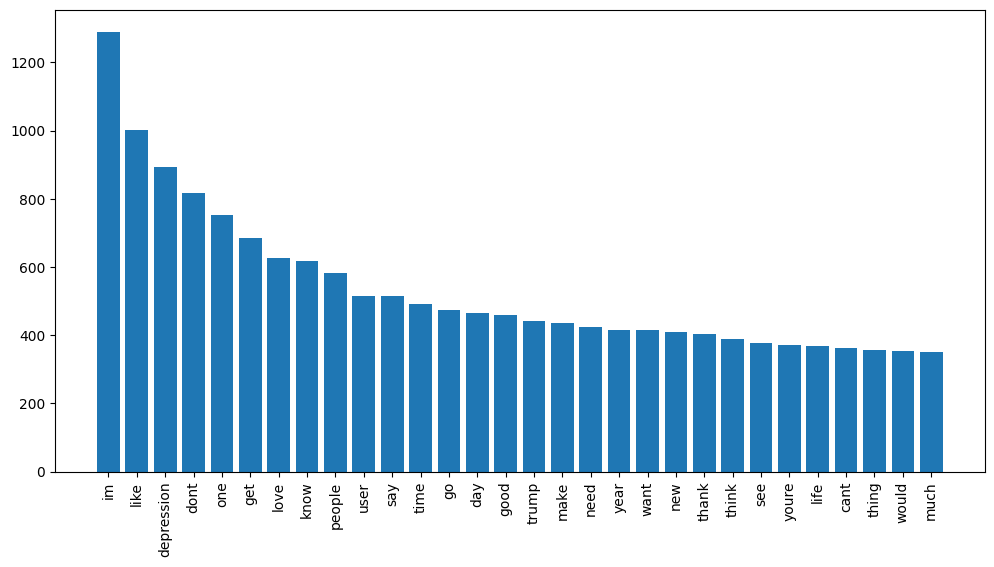

In [62]:
# Tokenizador especial de Tweets
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()

def textprep(line):
    tokens = tt.tokenize((str(line)))
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [re.sub(r'@\w+','',w) for w in tokens]
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w for w in tokens if w not in stop_words_nltk] 
    tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]
    return tokens

df['tokens_tweet'] = df.apply(lambda row: textprep(row['post_text']), axis=1)
tokens = df['tokens_tweet'].explode().to_list()

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(30)
print('numero de palabras finales con tokenizador twitter= ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(12,6))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,tokens_tweet
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,"[year, since, diagnosed, anxiety, depression, ..."
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,"[sunday, need, break, im, planning, spend, lit..."
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,"[awake, tired, need, sleep, brain, idea]"
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,"[retro, bear, make, perfect, gift, great, begi..."
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,"[hard, say, whether, packing, list, making, li..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,"[day, without, sunshine, like, night]"
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,"[borens, law, charge, ponder, trouble, delegat..."
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,"[flow, chart, thoroughly, oversold, piece, pro..."
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,"[ship, safe, harbor, never, meant, stay]"


In [63]:
# Creación del BoW - en gensim es Dictionary
from gensim.corpora import Dictionary
#dictionary = Dictionary(df.tokens_title) 
dictionary = Dictionary(df.tokens_tweet) #Ajuste TWEETS

# Bag-of-words representation of the documents.
#corpus = [dictionary.doc2bow(doc) for doc in df.tokens_title]
corpus = [dictionary.doc2bow(doc) for doc in df.tokens_tweet] #Ajuste TWEETS

print(corpus[:5])

print(dictionary)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1)], [(5, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(16, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)], [(0, 1), (16, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)]]
Dictionary<27198 unique tokens: ['anxiety', 'come', 'depression', 'diagnosed', 'far']...>


In [65]:
# Construir matriz de documentos vs términos - Para LDA
# libreria para paralelizar
import multiprocessing as mp
import time

t0 = time.time()
pool = mp.Pool(mp.cpu_count())
#doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in df.tokens_title])
doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in df.tokens_tweet]) #Ajuste TWEETS
pool.close()
print(time.time()-t0)

6.386370420455933


In [70]:
# K óptimo
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore


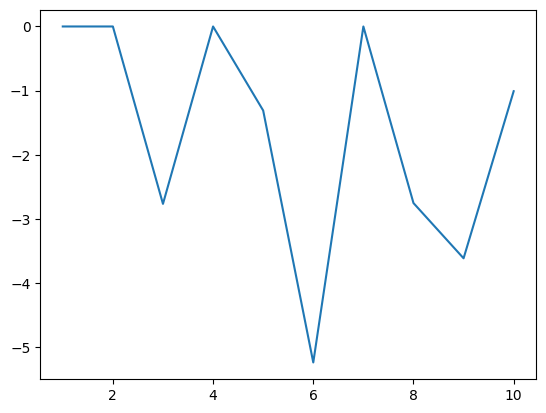

In [ ]:
# K óptimo


#m1 = LdaModel(corpus, 1, dictionary) # -2.8726158708290814
#m2 = LdaModel(corpus, 2, dictionary)
#m3 = LdaModel(corpus, 3, dictionary)
#m4 = LdaModel(corpus, 4, dictionary)
#m5 = LdaModel(corpus, 5, dictionary) # -2.7572875119938436
#m6 = LdaModel(corpus, 6, dictionary)
#m7 = LdaModel(corpus, 7, dictionary)
#m8 = LdaModel(corpus, 8, dictionary)
#m9 = LdaModel(corpus, 9, dictionary)
#m10 = LdaModel(corpus, 10, dictionary) # -1.4280109397235718
#m11 = LdaModel(corpus, 11, dictionary) # -2.7086058169783507
#m12 = LdaModel(corpus, 12, dictionary) # 0.0
#m15 = LdaModel(corpus, 15, dictionary) # 0.0
#m20 = LdaModel(corpus, 20, dictionary) # 0.0
coherence = []
for i in range(1,11):
    lda_model = LdaMulticore(corpus, num_topics=i, id2word = dictionary, passes=10, workers=10, iterations=50)
    corpus_lda = lda_model[corpus]
    cm = CoherenceModel.for_models([lda_model], dictionary, corpus=corpus_lda, coherence='u_mass')
    coherence.append(cm.get_coherence()) # get coherence value
    #print(coherence)

import matplotlib.pyplot as plt
plt.plot(range(1,11),coherence)
#corpus_lda = m12[corpus]



In [ ]:
coherence

[0.0,
 0.0,
 -2.763102111592855,
 0.0,
 -1.3088307365373515,
 -5.233763688836915,
 0.0,
 -2.7504607191072887,
 -3.6109665980560077,
 -1.0081512457605624]

In [ ]:
df

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,tokens_tweet
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,"[year, since, diagnosed, anxiety, depression, ..."
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,"[sunday, need, break, im, planning, spend, lit..."
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,"[awake, tired, need, sleep, brain, idea]"
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,"[retro, bear, make, perfect, gift, great, begi..."
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,"[hard, say, whether, packing, list, making, li..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,"[day, without, sunshine, like, night]"
19996,19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,"[borens, law, charge, ponder, trouble, delegat..."
19997,19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,"[flow, chart, thoroughly, oversold, piece, pro..."
19998,19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,"[ship, safe, harbor, never, meant, stay]"


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['tokens_tweet'], df['label'], random_state = 0)

In [ ]:
corpus_train  = [dictionary.doc2bow(doc) for doc in X_train] #Ajuste TWEETS
corpus_test  = [dictionary.doc2bow(doc) for doc in X_test] #Ajuste TWEETS


In [ ]:
corpus_test

[[(916, 1), (2356, 1), (2691, 1), (5546, 1), (6360, 1)],
 [(5, 1), (116, 1), (136, 1), (7558, 1), (7690, 1), (9808, 1)],
 [(5, 1),
  (51, 1),
  (288, 1),
  (289, 1),
  (370, 1),
  (649, 1),
  (1940, 1),
  (4245, 1),
  (10176, 1),
  (22245, 1)],
 [(775, 1), (6900, 1), (25924, 1), (25925, 1)],
 [(222, 1), (2650, 1), (7780, 1)],
 [(1089, 1), (1090, 1), (1091, 1), (1092, 1)],
 [(21, 1),
  (2455, 1),
  (2504, 1),
  (4769, 1),
  (7372, 1),
  (7424, 1),
  (7538, 1),
  (7843, 1),
  (7844, 1)],
 [(22, 1),
  (33, 1),
  (1409, 1),
  (1718, 1),
  (2574, 1),
  (2602, 1),
  (2691, 1),
  (3027, 1),
  (10743, 1),
  (17332, 1)],
 [(750, 1), (773, 1), (1634, 1), (1747, 1), (2488, 1)],
 [(2, 1),
  (467, 1),
  (594, 1),
  (1430, 1),
  (3260, 1),
  (4261, 1),
  (4307, 1),
  (4308, 1)],
 [(95, 2),
  (174, 1),
  (209, 1),
  (1447, 1),
  (1626, 1),
  (3166, 1),
  (5432, 1),
  (8219, 1),
  (19896, 1),
  (20188, 1)],
 [(916, 1), (2356, 1), (2691, 1), (25436, 1)],
 [(916, 1), (2356, 1), (2691, 1), (18438, 1), (2

In [68]:
t0 = time.time()
lda_model = LdaMulticore(corpus, num_topics=3, id2word = dictionary, passes=10, workers=10, iterations=50, random_state=42)
print(time.time()-t0)

In [ ]:
def assigntopic(doc):
    vector = lda_model[dictionary.doc2bow(doc)] 
    vector = sorted(vector, key=lambda item: -item[1]) # topN: todos los tópicos ordenados de mayor a menor
    return vector

In [ ]:
lda_topic_assignment = [max(p,key=lambda item: item[1]) for p in lda_model[corpus]]

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import time

t0 = time.time()
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary, sort_topics = False)
print(time.time()-t0)
vis

9.54015040397644


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.032227 -0.083257       1        1  33.966263
1     -0.058849  0.068473       2        1  35.065112
2      0.091076  0.014784       3        1  30.968625, topic_info=            Term         Freq        Total Category  logprob  loglift
5             im  1044.000000  1044.000000  Default  30.0000  30.0000
6900        user   398.000000   398.000000  Default  29.0000  29.0000
2     depression   714.000000   714.000000  Default  28.0000  28.0000
92           one   569.000000   569.000000  Default  27.0000  27.0000
382       people   488.000000   488.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
12          year   100.732667   340.023562   Topic3  -6.0583  -0.0443
43          life    94.310376   295.357422   Topic3  -6.1242   0.0306
95          want    93.349466   323.102101   Topic3  -6.1345  -0.0694
29           get    95.435905   545.872053   Topic3  -6.1124  -0.5717
222         dont    86.492208   653.811102   Topic3  -6.2108  -0.8506

[273 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
219        2  0.936920     21
219        3  0.072071     21
2604       1  0.923211      3
2604       2  0.015387      3
2604       3  0.061547      3
...      ...       ...    ...
23420      2  0.049750   yong
23420      3  0.542274   yong
662        1  0.308705  youre
662        2  0.456042  youre
662        3  0.235037  youre

[528 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [ ]:
vector = lda_model[corpus_test]


In [ ]:
i=2
print(corpus_test[i])
print(vector[i])
print(y_test)

[(5, 1), (51, 1), (288, 1), (289, 1), (370, 1), (649, 1), (1940, 1), (4245, 1), (10176, 1), (22245, 1)]
[(0, 0.42674968), (1, 0.33682147), (2, 0.2364289)]
19134    0
4981     1
16643    0
19117    0
5306     1
        ..
10235    0
1914     1
13584    0
5594     1
16222    0
Name: label, Length: 5000, dtype: int64


# K Means

In [13]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
dataframeclean=pd.DataFrame()
dataframeclean=df[['tokens_tweet']]
dataframeclean['tweet']=""

i=0

for word in df['tokens_tweet']:
  listToStr = ' '.join([str(elem) for elem in word])
  dataframeclean['tweet'][i]=listToStr
  i+=1
print(dataframeclean)

/tmp/ipykernel_1881/944673449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeclean['tweet']=""
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
                                            tokens_tweet  \
0      [year, since, diagnosed, anxiety, depression, ...   
1      [sunday, need, break, im, planning, spend, lit...   
2               [awake, tired, need, sleep, brain, idea]   
3      [retro, bear, make,

In [41]:
tfidf = TfidfVectorizer()
count_vect = CountVectorizer()

tfidf.fit(dataframeclean.tweet)
text = tfidf.transform(dataframeclean.tweet)


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters


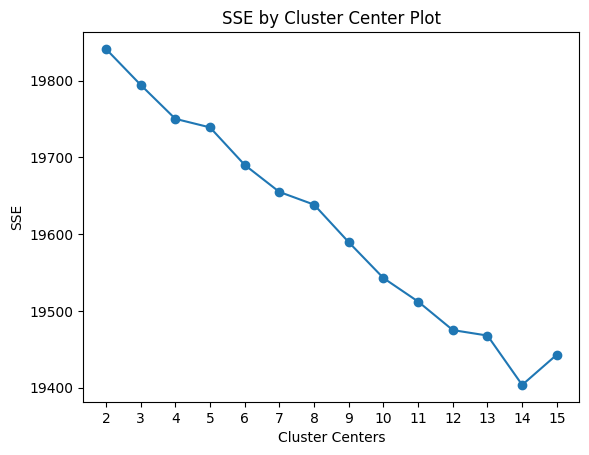

In [71]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, random_state=1).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 15)

In [43]:
clusters = KMeans(n_clusters=4,random_state=0).fit_predict(text)

In [44]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    a=[]
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        a.append(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
    return a
values=get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)

Cluster 0
time,people,go,good,get,dont,one,user,love,like

Cluster 1
still,go,voting,sure,really,going,gonna,like,sorry,im

Cluster 2
teller,article,health,suicide,anxiety,diagnosed,therapy,overcome,treatment,depression

Cluster 3
feel,love,want,im,one,even,people,like,dont,know


In [45]:
dfk=dataframeclean.copy()
dfk['cluster']=clusters

In [49]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 KB 58.0 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [50]:
from wordcloud import WordCloud

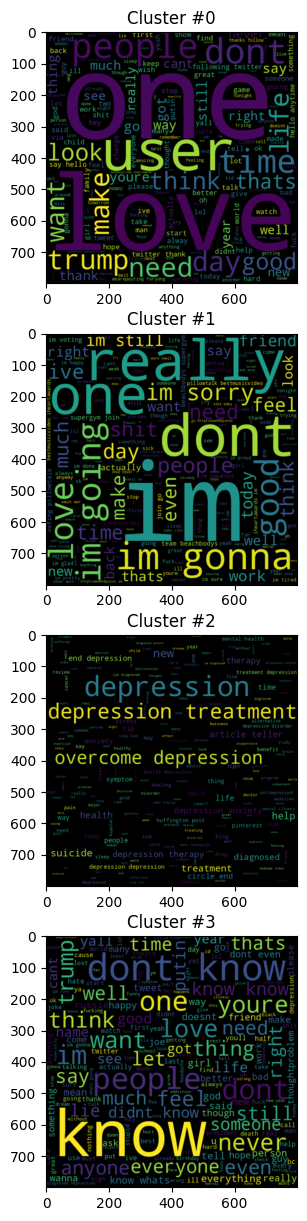

In [53]:

fig, axs = plt.subplots(4, figsize=(16,15))

for x in np.unique(clusters):
  texto1=" ".join(dfk.loc[dfk['cluster']==x,'tweet']) 
  wordcloud = WordCloud(width=800, height=800).generate(texto1)
  title="Cluster #"+str(x)


  axs[x].imshow(wordcloud, interpolation='bilinear')
  axs[x].set_title(title)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=05afff6f-eed1-4617-8c5f-e922b7f4b15f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>